In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rc('figure', figsize=(16,9))
import scipy.stats as stats
import env
from prepare import handle_nulls
from preprocessing import create_features, split_df

In [2]:
df = pd.read_csv('full-playlist.csv', index_col=0)

### Summarize Data

In [3]:
df.head()

,artist,album,release_date,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,explicit,popularity,disc_number
0,Tay-K,TRAPMAN,2020-07-12,TRAPMAN,6mecZbKK3JDeMdFRNxsCV5,0.792,0.594,2.0,-8.544,1.0,0.3000,0.000000,0.244,0.351,82.512,232803.0,4.0,True,43.0,1.0
1,Lil Wyte,Doubt Me Now,2003-03-04,Oxy Cotton,5PtMwNq8Dp31uYdGGacVJE,0.816,0.578,9.0,-6.912,1.0,0.2330,0.000000,0.114,0.265,148.077,193920.0,4.0,True,61.0,1.0
2,Kamelen,KINGPIN SLIM,2019-11-29,Kingpin O.G - Remix,6s8EhlBn2PIoESylkXnwYc,0.649,0.798,0.0,-6.450,0.0,0.1450,0.000000,0.409,0.717,160.011,254390.0,4.0,True,22.0,1.0
3,Waka Flocka Flame,Flockaveli,2010-10-01,Grove St. Party (feat. Kebo Gotti),2e9EZ2V5QGGZPMJacO3y0Y,0.705,0.702,0.0,-4.783,0.0,0.1080,0.000000,0.364,0.771,140.059,250493.0,4.0,True,62.0,1.0
4,Project Pat,Mista Don't Play: Everythangs Workin',2001-02-13,Don't Save Her (feat. Crunchy Black),3ZRd5Z0fiYtASLdEPPb16m,0.838,0.793,11.0,-5.470,0.0,0.0773,0.000001,0.106,0.800,160.003,261933.0,4.0,True,45.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6074 entries, 0 to 6073
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            6074 non-null   object 
 1   album             6074 non-null   object 
 2   release_date      6074 non-null   object 
 3   track_name        6074 non-null   object 
 4   track_id          6074 non-null   object 
 5   danceability      6073 non-null   float64
 6   energy            6073 non-null   float64
 7   key               6073 non-null   float64
 8   loudness          6073 non-null   float64
 9   mode              6073 non-null   float64
 10  speechiness       6073 non-null   float64
 11  instrumentalness  6073 non-null   float64
 12  liveness          6073 non-null   float64
 13  valence           6073 non-null   float64
 14  tempo             6073 non-null   float64
 15  duration_ms       6073 non-null   float64
 16  time_signature    6073 non-null   float64


In [5]:
df = create_features(handle_nulls(df))

/Users/brandmarz/codeup-data-science/Capstone-Project/preprocessing.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_seconds'] = df.duration_ms / 1_000
/Users/brandmarz/codeup-data-science/Capstone-Project/preprocessing.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_minutes'] = df.duration_seconds / 60
/Users/brandmarz/codeup-data-science/Capstone-Project/preprocessing.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [7]:
df = df.dropna()

In [8]:
# change explicit column to int
df['explicit'] = df.explicit.astype('int')
df['is_featured_artist'] = df.is_featured_artist.astype('int')
df['disc_number'] = df.disc_number.astype('int')
df['mode'] = df['mode'].astype('int')
df['key'] = df.key.astype('int')
df['duration_seconds'] = df.duration_seconds.astype('int')
df['duration_minutes'] = df.duration_minutes.astype('int')
df['duration_ms'] = df.duration_ms.astype('int')
df['popularity'] = df.popularity.astype('int')
df['time_signature'] = df.time_signature.astype('int')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6073 entries, 0 to 6073
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist              6073 non-null   object 
 1   album               6073 non-null   object 
 2   release_date        6073 non-null   object 
 3   track_name          6073 non-null   object 
 4   track_id            6073 non-null   object 
 5   danceability        6073 non-null   float64
 6   energy              6073 non-null   float64
 7   key                 6073 non-null   int64  
 8   loudness            6073 non-null   float64
 9   mode                6073 non-null   int64  
 10  speechiness         6073 non-null   float64
 11  instrumentalness    6073 non-null   float64
 12  liveness            6073 non-null   float64
 13  valence             6073 non-null   float64
 14  tempo               6073 non-null   float64
 15  duration_ms         6073 non-null   int64  
 16  time_s

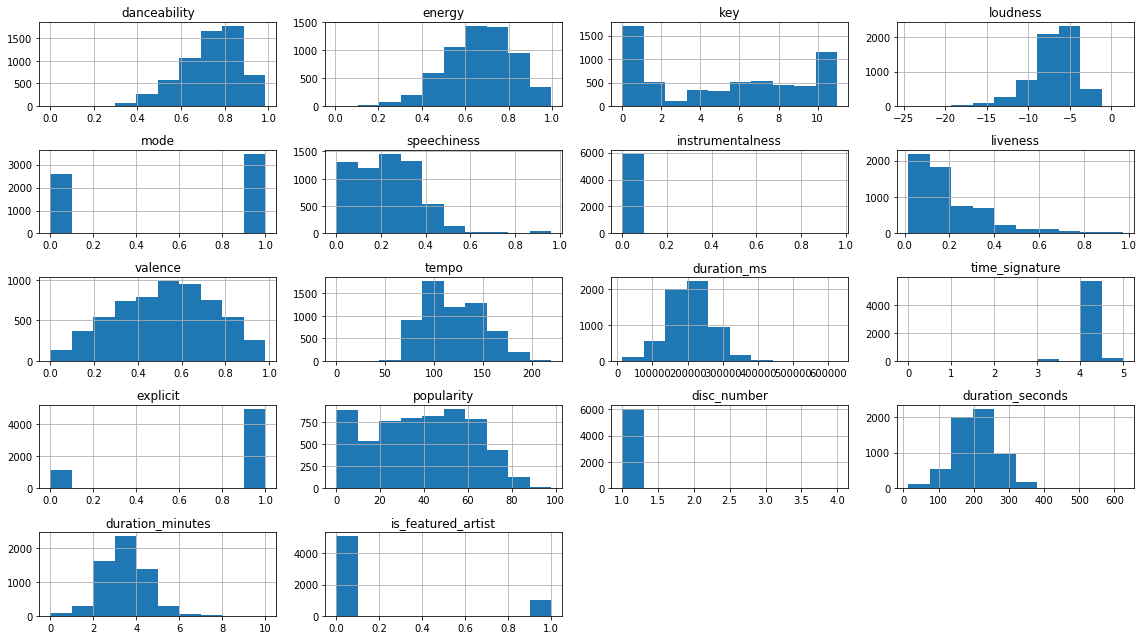

In [11]:
# distribution of variables
df.hist()
plt.tight_layout()

In [13]:
# value counts for all variables except 2
for col in df.drop(columns=['artist', 'album']).columns:
    print(df[col].value_counts(),'\n')

2004-01-01    81
2005-01-01    79
2006-01-01    75
2001-01-01    69
1999-01-01    67
              ..
2009-12-15     1
2015-02-14     1
2006-10-24     1
2003-09-01     1
2004-04-20     1
Name: release_date, Length: 1435, dtype: int64 

intro                           18
grillz                           6
money                            4
lemonade                         4
throw it up                      4
                                ..
change gonna come                1
just to get a rep                1
purple stuff                     1
jerry sprunger (with t-pain)     1
this way (produced by truth)     1
Name: track_name, Length: 5383, dtype: int64 

60eZwR3BMCP2yVkUBsD69O    2
71mDjdeVK9sqXmamMHaAfX    2
55mmAPgKnlhsU6QgCHVutw    2
4k5xJOxoJbMW5sdkZGOezj    2
19UUPNx5jccGgQ2GCIZkww    2
                         ..
1RS6Y7BAReV80FVwCabKIK    1
3yOdTp1xYdqYVUOBQT4Cjl    1
71mNLAZsr1frFhpCa3JI8G    1
1U16aNzvnlfARgjWXjKmQj    1
71S4nqYIr0BqGcjj7iXM0J    1
Name: track_id, Length: 

In [14]:
train, validate, test = split_df(df)

train shape:  (4262, 26) , validate shape:  (1203, 26) , test shape:  (608, 26)

train percent:  70.0 , validate percent:  20.0 , test percent:  10.0


In [15]:
train.head()

,artist,album,release_date,track_name,track_id,danceability,energy,key,loudness,mode,...,time_signature,explicit,popularity,disc_number,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day
5491,yfn lucci,wet (she got that…),2020-02-14,wet (she got that…),4GurWpxvH3NoWz9f9wirPq,0.695,0.642,1,-6.130,0,...,4,1,76,1,209,3,0,2020,02,14
2402,nelly,best of nelly,2009-01-01,ride wit me,5x2TDyeeTpf0riUoQDrvsV,0.850,0.707,7,-6.507,1,...,4,1,58,1,291,4,0,2009,01,01
156,tay-k,#santanaworld (+),2017-12-14,megaman,6ikgPqC9vhkduTdIpsqYdj,0.744,0.314,8,-8.871,1,...,4,1,59,1,133,2,0,2017,12,14
1698,method man,tical (deluxe edition),2014-09-16,i'll be there for you/you're all i need to get...,6C3yPXYG2NJYlIYVe5J7hv,0.722,0.745,4,-6.059,0,...,4,0,60,2,309,5,0,2014,09,16
2892,promoting sounds,hit the floor,2020-10-30,hit the floor,7MUW9VPYDM00UdwF1csfCq,0.787,0.502,9,-5.119,0,...,4,1,60,1,117,1,0,2020,10,30


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4262 entries, 5491 to 2032
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist              4262 non-null   object 
 1   album               4262 non-null   object 
 2   release_date        4262 non-null   object 
 3   track_name          4262 non-null   object 
 4   track_id            4262 non-null   object 
 5   danceability        4262 non-null   float64
 6   energy              4262 non-null   float64
 7   key                 4262 non-null   int64  
 8   loudness            4262 non-null   float64
 9   mode                4262 non-null   int64  
 10  speechiness         4262 non-null   float64
 11  instrumentalness    4262 non-null   float64
 12  liveness            4262 non-null   float64
 13  valence             4262 non-null   float64
 14  tempo               4262 non-null   float64
 15  duration_ms         4262 non-null   int64  
 16  tim

In [17]:
cat_vars = ['key', 'mode', 'time_signature', 'explicit', 'disc_number',
            'is_featured_artist']
cont_vars = ['danceability', 'energy', 'loudness', 'speechiness', 
             'instrumentalness', 'liveness', 'valence','tempo', 
             'duration_seconds']

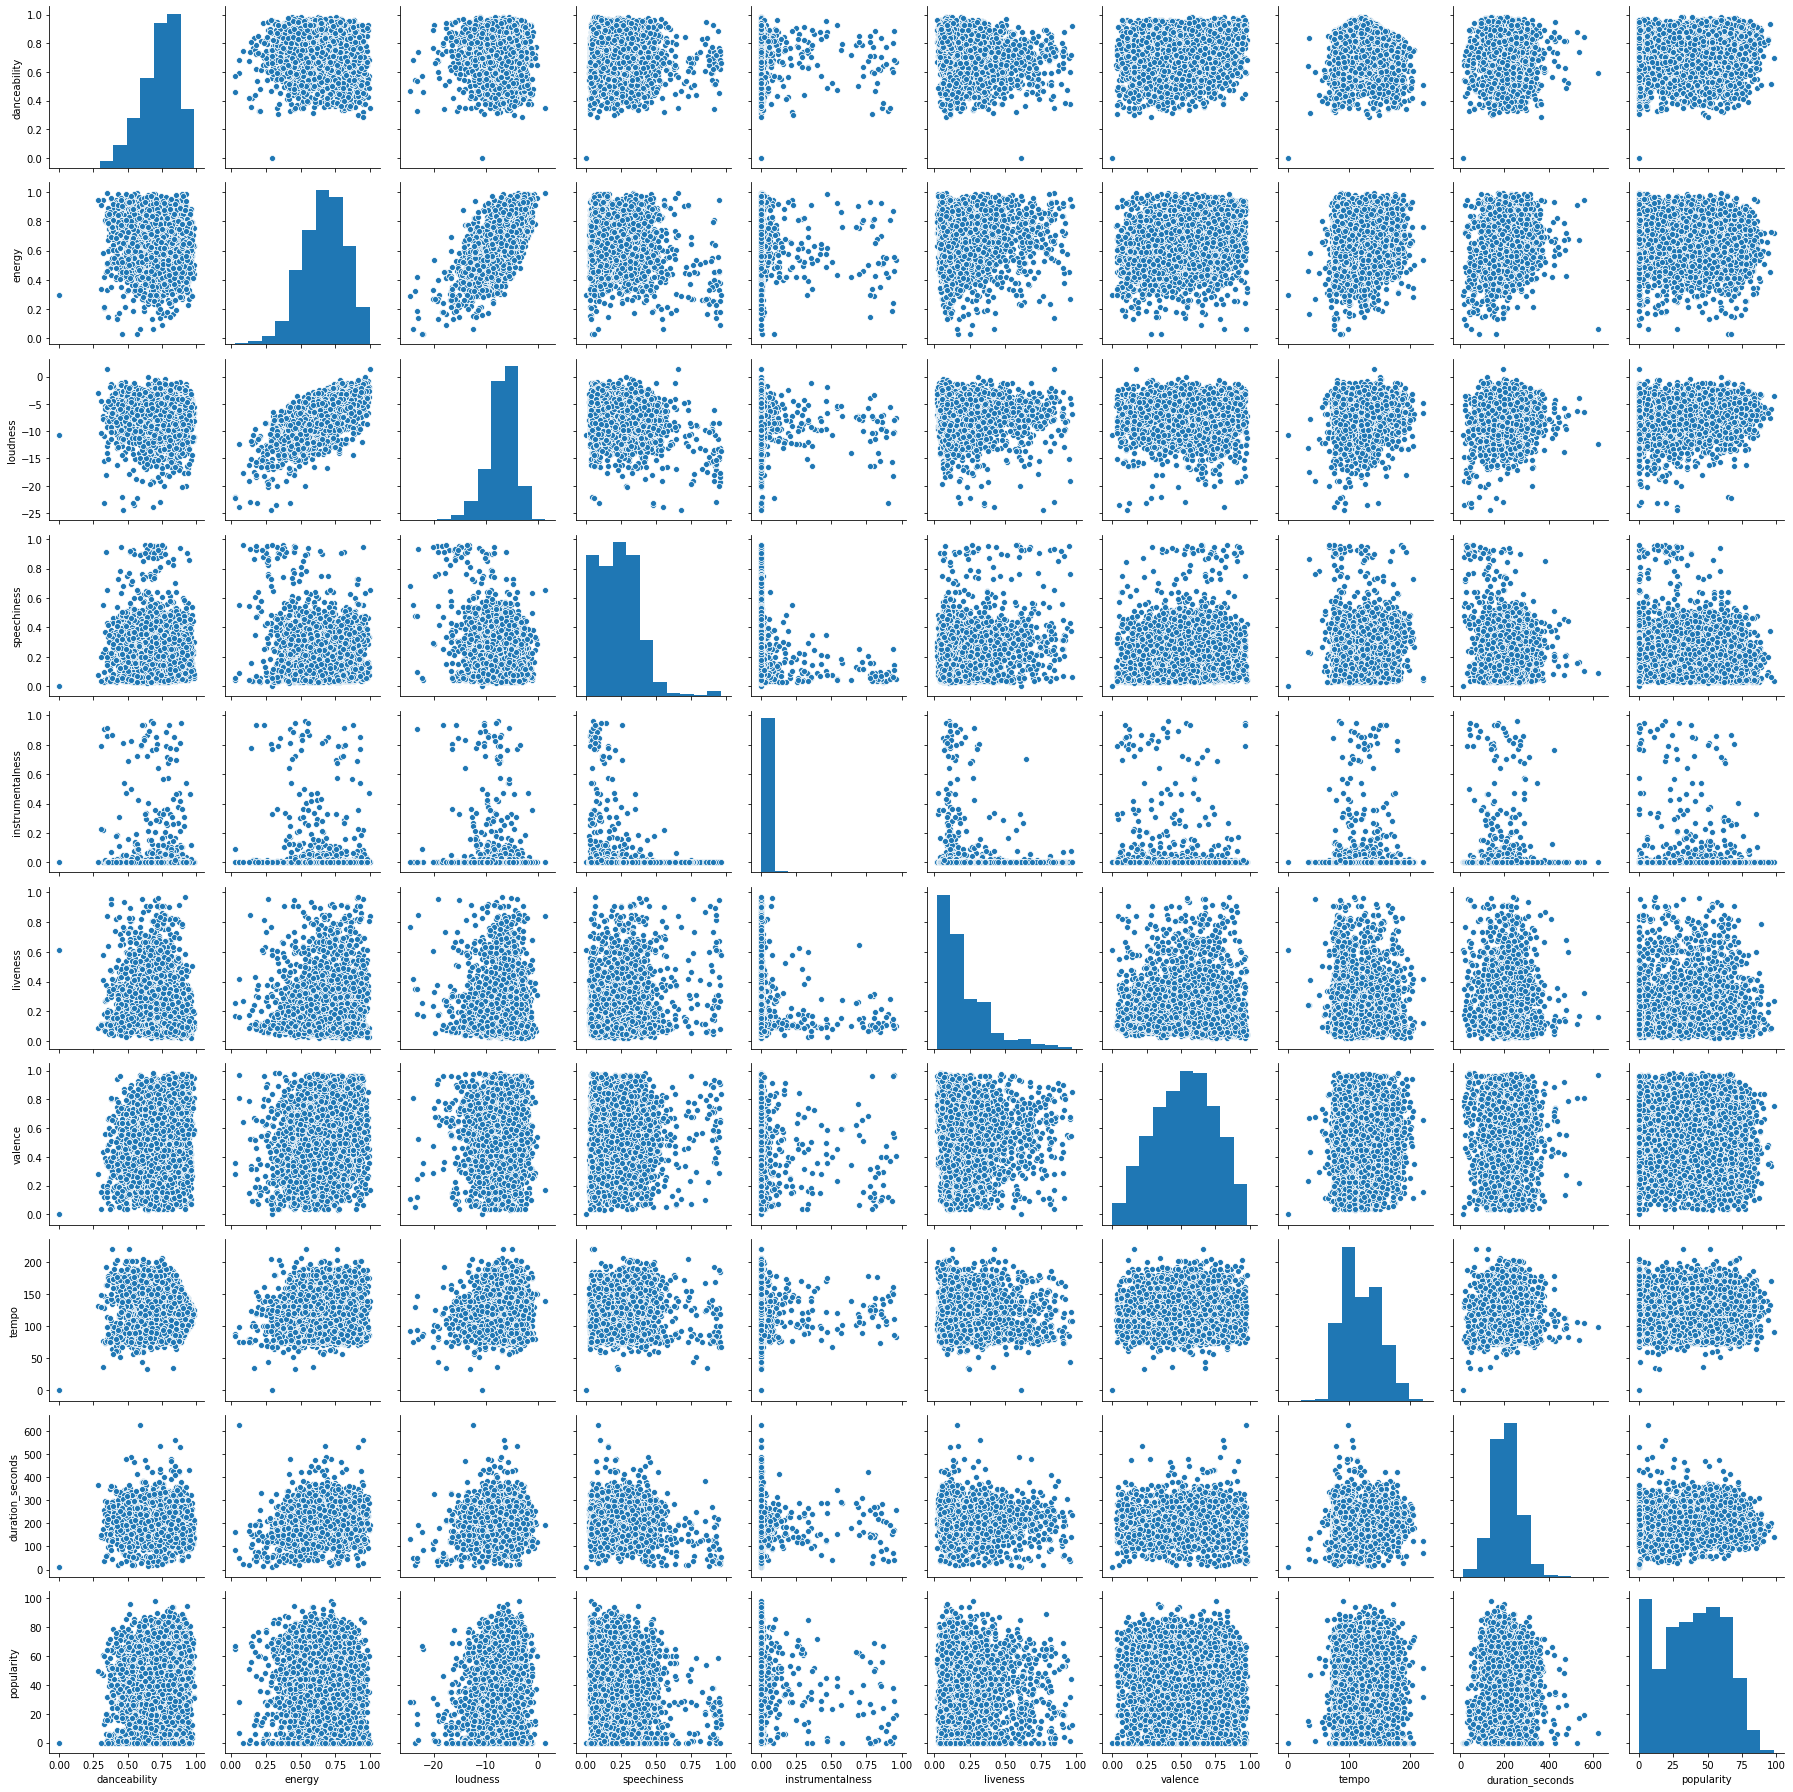

In [28]:
#Continuous variable relationships with Popularity
sns.pairplot(data=train[cont_vars + ['popularity']])
plt.tight_layout()

<div class="alert alert-block alert-info">Takeaways: 
    <li>We may find some useful clusters since there is some spread in the variable relationships</li>
<li>There's no apparent linear relationships with popularity</li>
<li>more data is definitely needed</li>
<li>seems to be some positive correlation between loudness/energy, danceability/valence (hypo-test)</li>
</div>

---

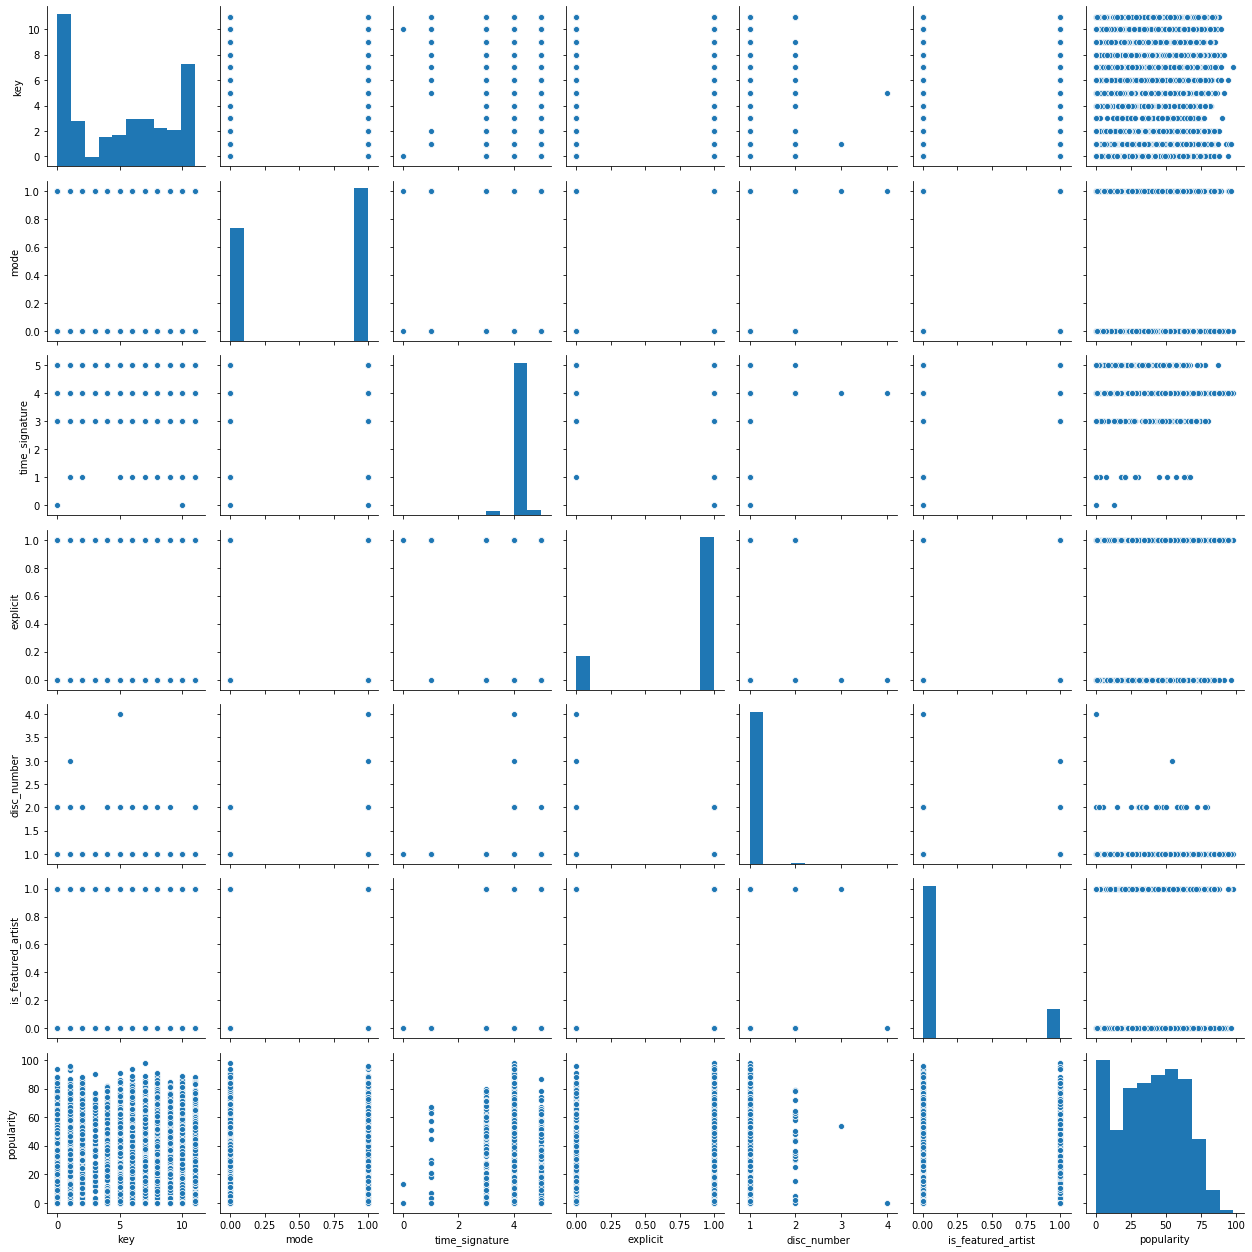

In [27]:
#Categorical variable relationships with Popularity
sns.pairplot(data=train[cat_vars + ['popularity']])
plt.tight_layout()

<div class="alert alert-block alert-info">Takeaways: 
<li>popularity seems to decrease with disc number</li>
<li>a higher time signature seems to indicate higher popularity, namely '4'</li>
</div>

---

In [29]:
train.nunique()

artist                1211
album                 2332
release_date          1174
track_name            3913
track_id              4213
danceability           604
energy                 706
key                     12
loudness              3333
mode                     2
speechiness           1030
instrumentalness      1270
liveness              1074
valence                926
tempo                 3842
duration_ms           3840
time_signature           5
explicit                 2
popularity              97
disc_number              4
duration_seconds       360
duration_minutes        11
is_featured_artist       2
release_year            38
release_month           12
release_day             31
dtype: int64

<div class="alert alert-block alert-info">Takeaways<br><br>
    Categorical variables
   <li> key</li>
    <li> mode</li>
    <li> time_signature</li>
    <li> explicit</li>
        <br>
    Continuous variables
    <li> danceability</li>
    <li> energy</li>
    <li> loudness</li>
    <li> speechiness</li>
    <li> instrumentalness</li>
    <li> liveness</li>
    <li> valence</li>
    <li> tempo</li>
    <li> duration_ms</li>
    </div>

---

In [30]:
train.describe()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,explicit,popularity,disc_number,duration_seconds,duration_minutes,is_featured_artist
count,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000
mean,0.736966,0.666634,5.248006,-6.970160,0.573674,0.233846,0.012939,0.206380,0.524131,120.057999,206730.370483,3.992257,0.817457,38.766072,1.006804,206.256687,2.944158,0.162834
std,0.133854,0.155232,3.756270,2.840335,0.494600,0.148289,0.085036,0.162674,0.218584,29.968323,62158.639660,0.308962,0.386337,23.029219,0.092936,62.149714,1.067617,0.369258
min,0.000000,0.027900,0.000000,-24.464000,0.000000,0.000000,0.000000,0.019300,0.000000,0.000000,13853.000000,0.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000
25%,0.657000,0.565000,1.000000,-8.339000,0.000000,0.108000,0.000000,0.099200,0.360000,94.090000,167091.000000,4.000000,1.000000,21.000000,1.000000,167.000000,2.000000,0.000000
50%,0.758000,0.676000,6.000000,-6.552000,1.000000,0.227000,0.000000,0.139000,0.532000,119.976500,204707.000000,4.000000,1.000000,40.000000,1.000000,204.000000,3.000000,0.000000
75%,0.838750,0.782000,9.000000,-5.084250,1.000000,0.324000,0.000022,0.281000,0.691000,141.967750,244326.500000,4.000000,1.000000,57.000000,1.000000,244.000000,4.000000,0.000000
max,0.986000,0.997000,11.000000,1.421000,1.000000,0.962000,0.962000,0.969000,0.982000,220.251000,625173.000000,5.000000,1.000000,98.000000,4.000000,625.000000,10.000000,1.000000


<div class="alert alert-block alert-info">Takeaways: 
<li> We may find some useful clusters since there is some spread in the variable relationships</li>
<li> There's no apparent linear relationships with popularity</li>
<li> more data is definitely needed</li>
<li> seems to be some positive correlation between loudness/energy, danceability/valence (hypo-test)</li></div>

In [21]:
train.head()

,artist,album,release_date,track_name,track_id,danceability,energy,key,loudness,mode,...,time_signature,explicit,popularity,disc_number,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day
5491,yfn lucci,wet (she got that…),2020-02-14,wet (she got that…),4GurWpxvH3NoWz9f9wirPq,0.695,0.642,1,-6.130,0,...,4,1,76,1,209,3,0,2020,02,14
2402,nelly,best of nelly,2009-01-01,ride wit me,5x2TDyeeTpf0riUoQDrvsV,0.850,0.707,7,-6.507,1,...,4,1,58,1,291,4,0,2009,01,01
156,tay-k,#santanaworld (+),2017-12-14,megaman,6ikgPqC9vhkduTdIpsqYdj,0.744,0.314,8,-8.871,1,...,4,1,59,1,133,2,0,2017,12,14
1698,method man,tical (deluxe edition),2014-09-16,i'll be there for you/you're all i need to get...,6C3yPXYG2NJYlIYVe5J7hv,0.722,0.745,4,-6.059,0,...,4,0,60,2,309,5,0,2014,09,16
2892,promoting sounds,hit the floor,2020-10-30,hit the floor,7MUW9VPYDM00UdwF1csfCq,0.787,0.502,9,-5.119,0,...,4,1,60,1,117,1,0,2020,10,30


---
# Correlation Tests: Linear correlation with Popularity

In [31]:
train[cont_vars + ['popularity']].corr()['popularity'].sort_values(ascending=False)

popularity          1.000000
loudness            0.120882
danceability        0.109843
tempo               0.048378
instrumentalness   -0.052505
valence            -0.053943
liveness           -0.067257
duration_seconds   -0.069263
energy             -0.083137
speechiness        -0.140232
Name: popularity, dtype: float64

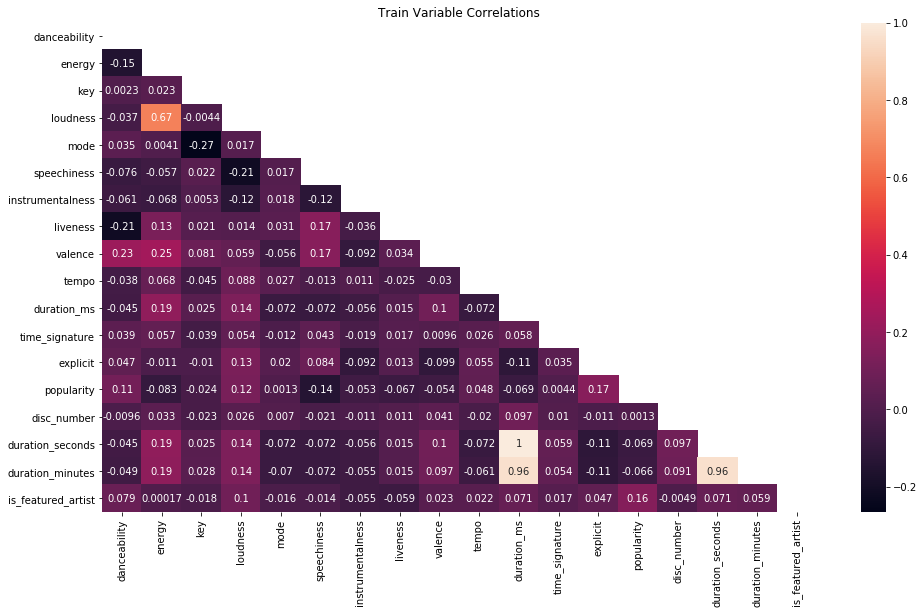

In [33]:
plt.title('Train Variable Correlations')
plt.rc('figure', figsize=(16,9))
sns.heatmap(train.corr(), annot=True, mask= np.triu(np.ones_like(train.corr(), dtype=np.bool)))

> **Does liveness have any correlation with a song's popularity?**

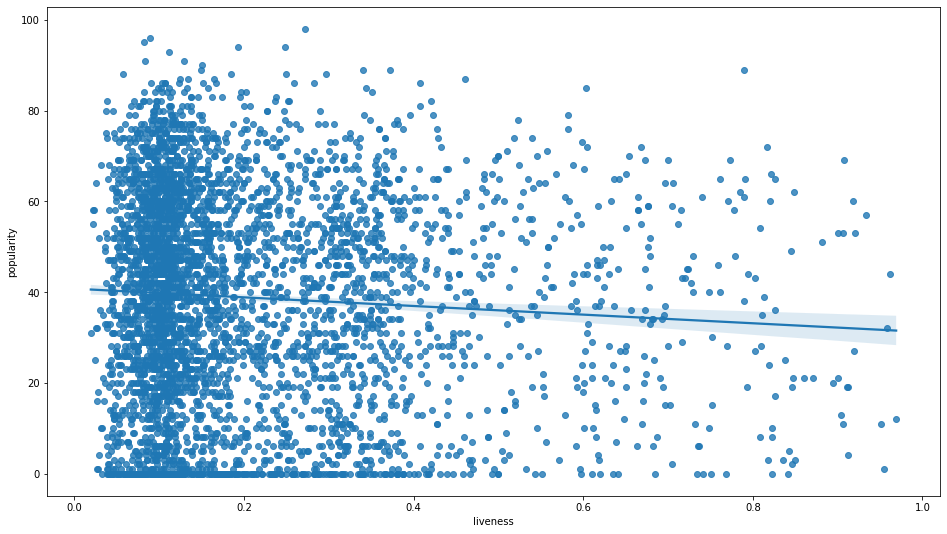

In [36]:
sns.regplot(x='liveness', y='popularity', data=train)

- $H_0$: There is no linear relationship between liveness and popularity.
- $H_a$: There is a linear relationship between liveness and popularity.

In [61]:
null = 'there is no linear relationship between liveness and popularity'

x = train.liveness
y = train.popularity

alpha = .05

r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

if p < alpha:
    print('We reject the null that', null)
else:
    print('We fail to reject the null that', null)

r = -0.06725703974912957
p = 1.1102974147057131e-05
We reject the null that there is no linear relationship between liveness and popularity


<div class="alert alert-block alert-info">Conclusion: Liveness and popularity have a small negative linear relationship, <b>r: -.07</b></div>

---

> **Does song length have any correlation with a song's popularity?**

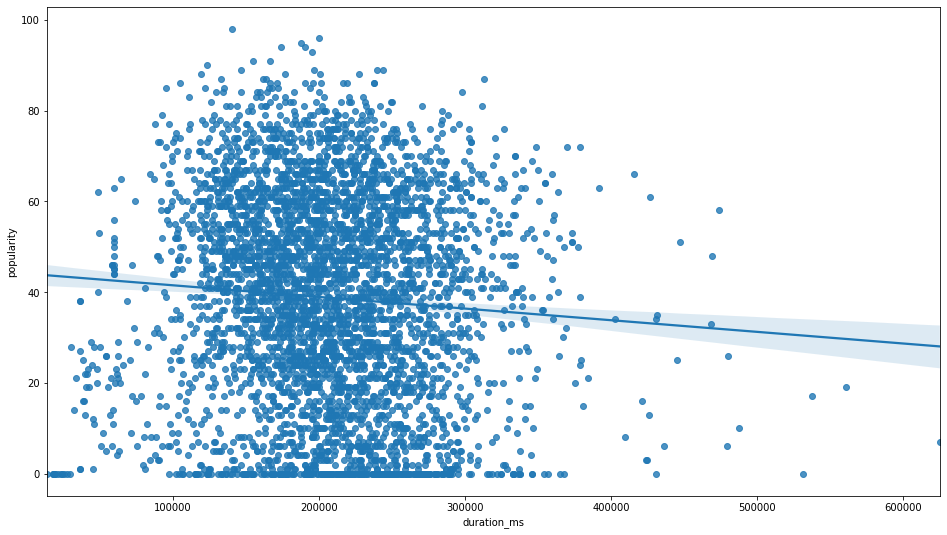

In [59]:
sns.regplot(x='duration_ms', y='popularity', data=train)

- $H_0$: There is no linear relationship between song length and popularity.
- $H_a$: There is a linear relationship between song length and popularity.

In [60]:
null = 'there is no linear relationship between song length and popularity'

x = train.duration_ms
y = train.popularity

alpha = .05

r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

if p < alpha:
    print('We reject the null that', null)
else:
    print('We fail to reject the null that', null)

r = -0.0692477888078101
p = 6.043023417174102e-06
We reject the null that there is no linear relationship between song length and popularity


<div class="alert alert-block alert-info">Conclusion: Song length and popularity have a small negative linear relationship, <b>r: -.07</b></div>

---

# T-Tests: Comparing Mean Popularity

> **Is the mean popularity of songs with time signature 4 significantly greater than the mean popularity of all songs(within the train data)?**

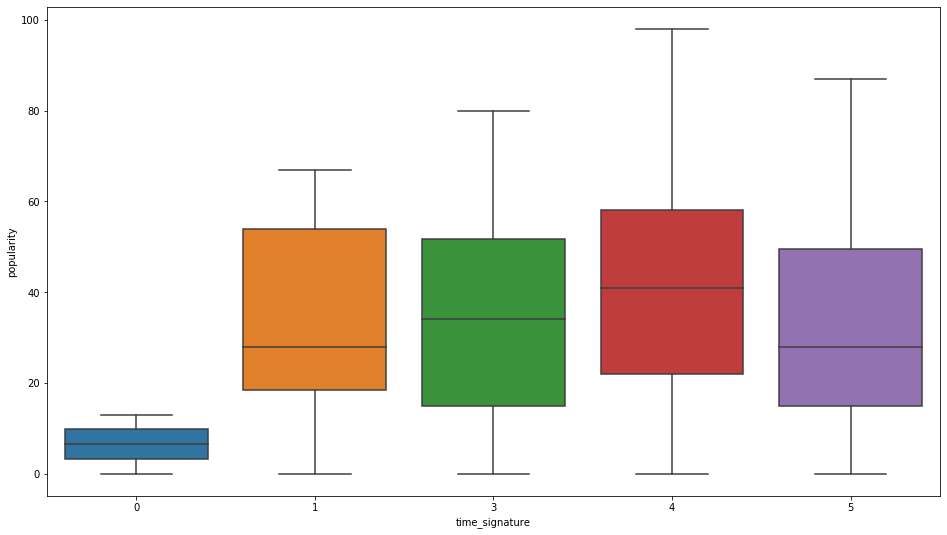

In [68]:
sns.boxplot(x='time_signature', y='popularity', data=train)

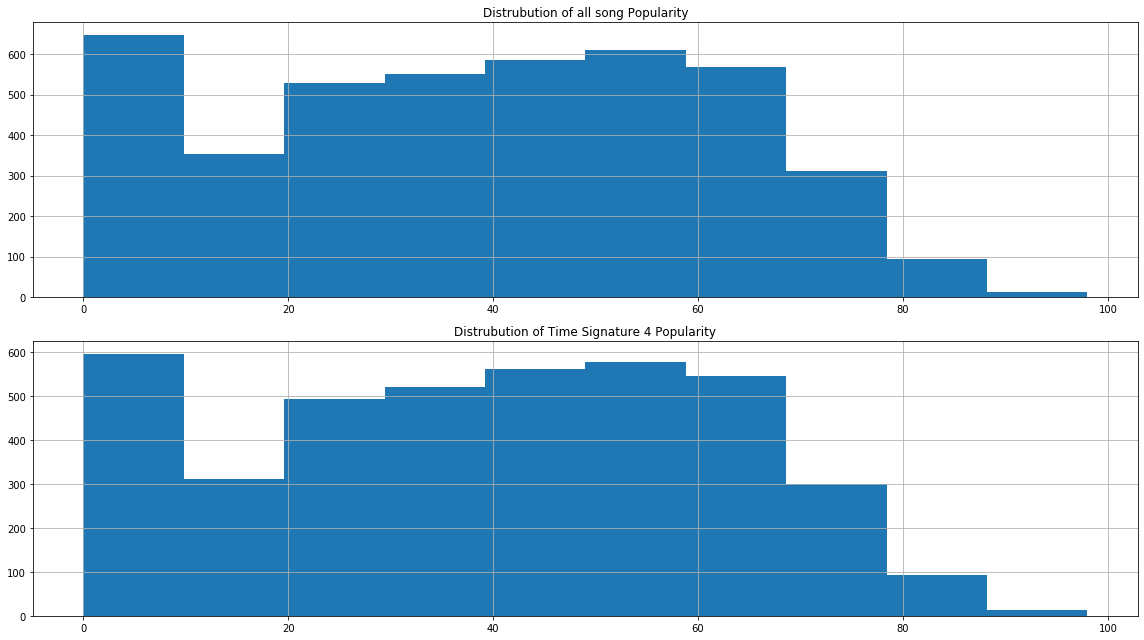

In [87]:
plt.subplot(211)
plt.title('Distrubution of all song Popularity')
train.popularity.hist()

plt.subplot(212)
plt.title('Distrubution of Time Signature 4 Popularity')
train[train.time_signature == 4].popularity.hist(label='time sig 4')
plt.tight_layout()

In [69]:
train.time_signature.value_counts()

4    4005
5     130
3     110
1      15
0       2
Name: time_signature, dtype: int64

**Hypothesis**

$H_{0}$: Mean of popularity of time signature 4 =< Mean of popularity of all songs

$H_{a}$: Mean of popularity of time signature 4 > Mean of popularity of all songs

In [96]:
null = 'the mean of popularity of time signature 4 =< mean of popularity of all songs'

sample = train[train.time_signature == 4].popularity
overall = train.popularity.mean()

alpha = .05

t, p = stats.ttest_1samp(sample, overall)
print('t =', t)
print('p =', p)

if p/2 > alpha:
    print('We fail to reject the null that', null)
elif t < 0:
    print('We fail to reject the null that', null)
else:
    print('We reject the null that', null)
    
print('Overall mean', overall, '\n Sample mean', sample.mean())

t = 1.1481522270622189
p = 0.25097431716294066
We fail to reject the null that the mean of popularity of time signature 4 =< mean of popularity of all songs
Overall mean 38.76607226654153 
 Sample mean 39.18352059925093


<div class="alert alert-block alert-info">Conclusion: The mean popularity of time signature 4 is not significantly greater than the overall mean popularity</div>

---

> **Do tracks in a major key tend to be more popular than tracks in a minor key?**

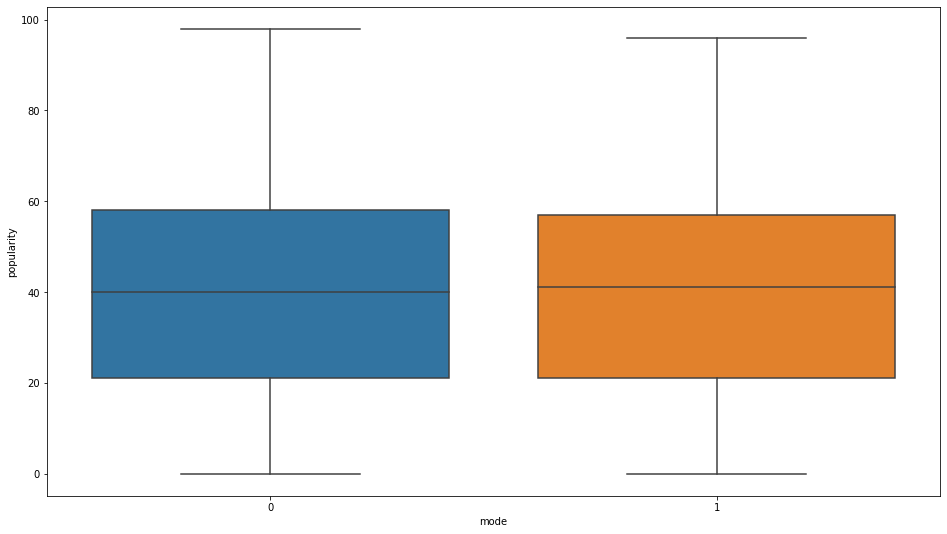

In [109]:
sns.boxplot(x='mode', y='popularity', data=train)

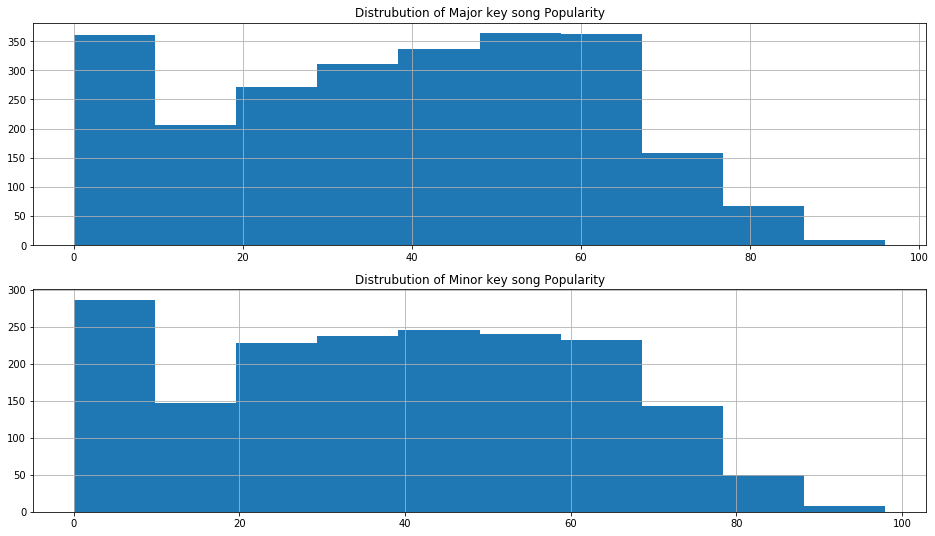

In [108]:
plt.subplot(211)
plt.title('Distrubution of Major key song Popularity')
train[train['mode'] == 1].popularity.hist()
plt.subplot(212)
plt.title('Distrubution of Minor key song Popularity')
train[train['mode'] == 0].popularity.hist()

In [105]:
train['mode'].value_counts()

1    2445
0    1817
Name: mode, dtype: int64

In [110]:
print(train[train['mode'] == 1].popularity.var())
print(train[train['mode'] == 0].popularity.var())

513.7789965158207
552.9294378350336


**Hypothesis**

$H_{0}$: Mean of popularity of major key songs =< Mean of popularity of minor key songs

$H_{a}$: Mean of popularity of major key songs > Mean of popularity of minor key songs

In [111]:
null = 'the mean of popularity of time signature 4 =< mean of popularity of all songs'

major = train[train['mode'] == 1].popularity
minor = train[train['mode'] == 0].popularity

alpha = .05

t, p = stats.ttest_ind(major, minor)
print('t =', t)
print('p =', p)

if p/2 > alpha:
    print('We fail to reject the null that', null)
elif t < 0:
    print('We fail to reject the null that', null)
else:
    print('We reject the null that', null)
    
print('Major mean', major.mean()) 
print('Minor mean', minor.mean())

t = 0.08734967862914236
p = 0.9303976725278619
We fail to reject the null that the mean of popularity of time signature 4 =< mean of popularity of all songs
Major mean 38.79263803680982
Minor mean 38.73032471106219


<div class="alert alert-block alert-info">Conclusion: The mean popularity of major key songs is not significantly greater than the mean popularity of minor key songs </div>

---